In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [45]:
df = pd.read_csv("../data/consumer/conductivity_data.csv")

display(df)
values = df["Value"].values[::20]
print(len(values))

,Timestamp,Value
0,2021-02-24 00:00:00,9212.88900
1,2021-02-24 00:00:15,9210.90605
2,2021-02-24 00:00:30,9208.92310
3,2021-02-24 00:00:45,9206.94015
4,2021-02-24 00:01:00,9204.95720
...,...,...
207355,2021-03-31 23:58:45,5931.60400
207356,2021-03-31 23:59:00,5931.60400
207357,2021-03-31 23:59:15,5931.60400
207358,2021-03-31 23:59:30,5931.60400


10368


(0.0, 15000.0)

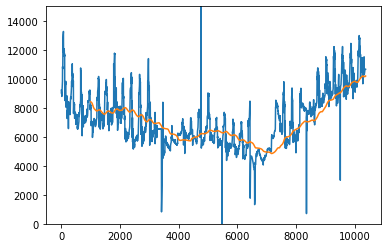

In [46]:

for i in range(8000, len(values)):
    values[i] += (i-8000)*2
plt.plot(values)

values = np.convolve(values, np.ones(1000)/1000, mode='valid')
plt.plot(range(1000, 1000+len(values)),values)
plt.ylim([0, 15000])

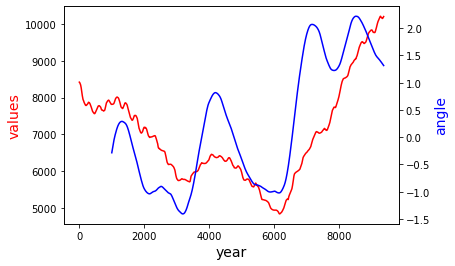

In [47]:

#number of points to fit
N = 1000

values = values[1:]


angle = []
residual = []
for i in range(N, len(values)):
    x = np.array(range(0, N))
    y = np.array(values[i-N:i])
    a, residuals, rank, singular_values, rcond = np.polyfit(x, y, deg = 1, full = True)
    #take the x**1 coefficient
    angle.append(a[0])
    #print(residuals)
    residual.append(residuals[0]/np.abs(values[i]))

    
#print(residual)
num = len(values)
#print(len(values))
#print(len(angle))


fig,ax = plt.subplots()
ax.plot(values[:num], color="red")
#ax.plot(residual, color="k")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("values",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(range(N, num), angle[:num],color="blue")
ax2.set_ylabel("angle",color="blue",fontsize=14)
#ax2.hlines(0, 60, [0])
plt.show()

